In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import datetime as dt

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
mbti = pd.read_pickle('mbti_ver1.pickle')
mbti.head()

,type,words_only,image,video_link,otherlink,n_video,n_links,n_image,n_otherlink,video_title,...,bracket_count,dots_count,n_char,n_word,mbti_ref_most,n_action,n_caps,n_caps_char,word_cap_ratio,char_cap_ratio
0,INFJ,"[, , enfp and intj moments sportscenter not to...",[http://41.media.tumblr.com/tumblr_lfouy03PMA1...,"[http://www.youtube.com/watch?v=qsXHcwe3krw, h...",[],17,24,7,0,"[FLYING IN MY PJs - [Living In Alaska 256], EN...",...,0,14,3242,581,ENFP,0,0,0,0.000000,0.000000
1,ENTP,[I'm finding the lack of me in these posts ver...,[http://img188.imageshack.us/img188/6422/6020d...,[http://www.youtube.com/watch?v=j5W73HaVQBg],[],1,10,9,0,[Jermaine Dupri - Welcome To Atlanta ft. Ludac...,...,0,19,6281,1210,ENTP,2,5,18,0.004132,0.002866
2,INTP,"[Good one _____, Of course, to which I say I k...",[],"[https://www.youtube.com/watch?v=fHiGbolFFGw, ...","[https://www.tumblr.com/blog/-alexxxandra-, ht...",3,5,0,2,"[Radiohead - Paranoid Android, Океан Ельзи - С...",...,0,13,4882,880,INTJ,0,1,4,0.001136,0.000819
3,INTJ,"[Dear INTP, I enjoyed our conversation the oth...",[],"[https://www.youtube.com/watch?v=uelHwf8o7_U, ...",[],2,2,0,0,"[Eminem - Love The Way You Lie ft. Rihanna, Ro...",...,1,26,5997,1111,ESFJ,0,6,19,0.005401,0.003168
4,ENTJ,"[You're fired., That's another silly misconcep...",[https://encrypted-tbn2.gstatic.com/images?q=t...,"[https://www.youtube.com/watch?v=Xh0vA6_8mv8, ...",[],3,6,3,0,"[Yung Gud - Hello (Ft. Yemi), Verbatim: What I...",...,0,21,5560,1010,ENTJ,0,6,37,0.005941,0.006655


In [4]:
#Spice things up a little by splitting to individual types
mbti['is_E'] = mbti['type'].apply(lambda x: 1 if x[0] == 'E' else 0)
mbti['is_S'] = mbti['type'].apply(lambda x: 1 if x[1] == 'S' else 0)
mbti['is_T'] = mbti['type'].apply(lambda x: 1 if x[2] == 'T' else 0)
mbti['is_J'] = mbti['type'].apply(lambda x: 1 if x[3] == 'J' else 0)

#Yes this is the direction I am gonna go.

In [5]:
mbti.columns

Index([u'type', u'words_only', u'image', u'video_link', u'otherlink',
       u'n_video', u'n_links', u'n_image', u'n_otherlink', u'video_title',
       u'emoticons', u'emoticon_count', u'mention_count', u'hashtag',
       u'hashtag_count', u'mbti_ref', u'mbti_ref_count', u'ennea',
       u'ennea_count', u'bracket_count', u'dots_count', u'n_char', u'n_word',
       u'mbti_ref_most', u'n_action', u'n_caps', u'n_caps_char',
       u'word_cap_ratio', u'char_cap_ratio', u'is_E', u'is_S', u'is_T',
       u'is_J'],
      dtype='object')

(array([  7.36500000e+03,   8.23000000e+02,   3.03000000e+02,
          8.30000000e+01,   6.00000000e+01,   2.40000000e+01,
          7.00000000e+00,   8.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  0. ,   4.7,   9.4,  14.1,  18.8,  23.5,  28.2,  32.9,  37.6,
         42.3,  47. ]),
 <a list of 10 Patch objects>)

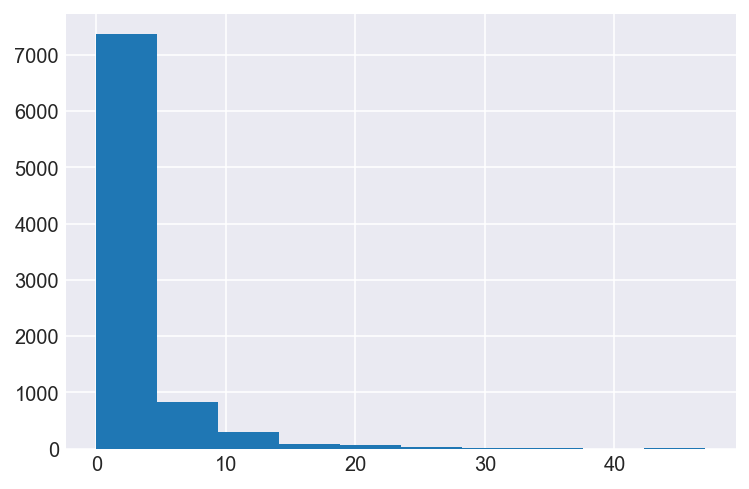

In [6]:
plt.hist(mbti['emoticon_count'])

Work to do:

- NLP stuff (Bag of words, topic thingy etc)
- Look at the current numerical data to look at how good/bad the classification would be
- I'll probably hibernate to go watch some NLP lectures, hopefully can wake up in time to perform some fantastic magic

In [14]:
import string
wordie = mbti['words_only'][0]
wordchunk = ' '.join(wordie)
nopunclist = [char for char in wordchunk if char not in string.punctuation]
nopuncchunk = ''.join(nopunclist)
print nopuncchunk

  enfp and intj moments sportscenter not top ten plays pranks What has been the most lifechanging experience in your life On repeat for most of today May the PerC Experience immerse you The last thing my INFJ friend posted on his facebook before committing suicide the next day Rest in peace Hello ENFJ7 Sorry to hear of your distress Its only natural for a relationship to not be perfection all the time in every moment of existence Try to figure the hard times as times of growth as 84389 84390  Welcome and stuff Game Set Match Prozac wellbrutin at least thirty minutes of moving your legs and I dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative Basically come up with three items youve determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by All things in moderation Sims is indeed a video game and a good one at that Note a good